Importing dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Collection and Preprocessing of Data

In [44]:
#loading the csv data to a Pandas DataFrame
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [45]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [46]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


observation: the dataset has 10 years of data

In [47]:
#no.of rows and columns
gold_dataset.shape

(2290, 6)

In [48]:
#getting some basic info about the data
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [49]:
#checking if there is any missing values
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


Observation: No missing values

In [50]:
#getting the statistical measures of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding the correlation

In [51]:
correlation = gold_dataset.drop('Date',axis=1).corr()

<Axes: >

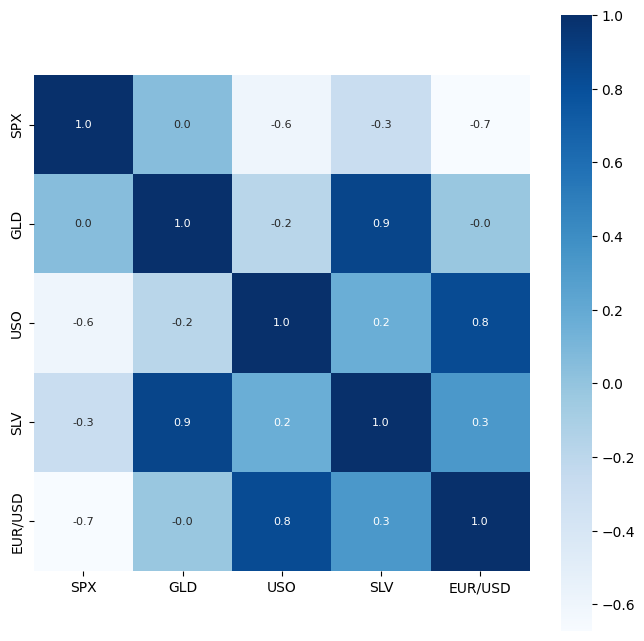

In [52]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [53]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4292239328.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

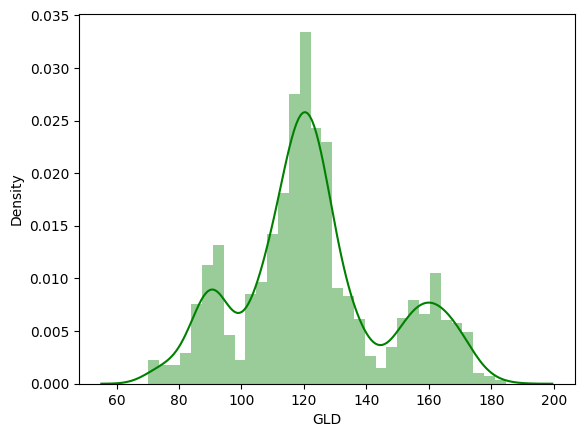

In [54]:
#checking the distribution of GLD price
sns.distplot(gold_dataset['GLD'],color='green')

Spliting the Features and Target

In [55]:
X = gold_dataset.drop(['Date','GLD'],axis = 1)
Y = gold_dataset['GLD']

In [56]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [57]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train Test Split

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Training the model

In [60]:
regressor = RandomForestRegressor(n_estimators=100)

In [61]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evaluating the model

In [62]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [63]:
print(test_data_prediction)

[168.73949966  81.90469994 116.06900034 127.62690035 120.73140181
 154.82329757 150.60309824 126.23510027 117.4666988  126.01380063
 116.89800107 171.50310074 141.68879783 168.02249876 115.17950038
 117.68430039 138.50460345 170.3456011  159.22690345 160.08749931
 155.16640005 125.19419985 176.15739889 157.30670335 125.21200049
  93.97189983  77.28090019 120.36370025 119.18029989 167.50789961
  88.13160042 125.11419985  91.19540097 117.7196001  121.08049924
 136.13870079 115.44700131 115.02590118 147.59349957 107.16040106
 103.87050213  87.26999819 126.45040039 117.7335003  152.16159882
 119.39050058 108.47799989 108.15489851  93.0033003  127.028898
  75.24740022 113.63229923 121.42300041 111.29089895 118.81799883
 120.83269937 160.04860051 168.53160019 146.9920967   85.88399865
  94.36130028  86.71499914  90.52490062 119.17670046 126.47500053
 127.66460003 168.72229964 122.28649903 117.175499    98.53199994
 168.66390185 142.73689811 131.96840208 121.27910245 120.23679949
 119.8098007

In [64]:
#R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)


R square error :  0.9890641596734193


Comparing the actual and predicted values in a plot

In [65]:
Y_test = list(Y_test)

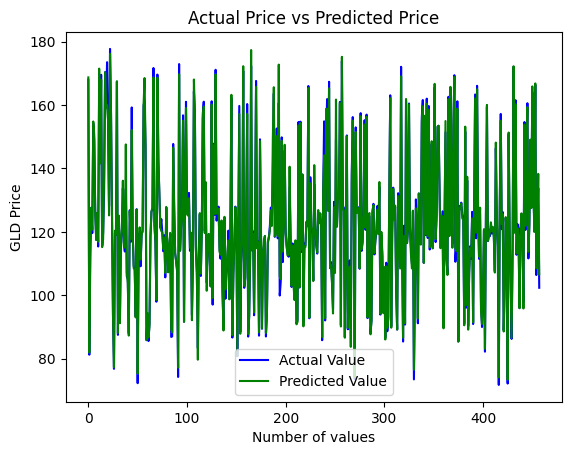

In [67]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()